<a href="https://colab.research.google.com/github/hwanginbeom/bigData/blob/master/algorithm_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python 머신러닝

## 1. colab 설정

In [ ]:
# matplotlib 한글 깨짐 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 이 셀 실행 후 런터임 재실행을 실시하세요

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [6]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import lightgbm as lgb
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') # 한글설정

In [7]:
# 파이썬 지수를 정수로 표현!
pd.options.display.float_format = '{:.5f}'.format

# 코랩 그래프 크게!

%matplotlib inline

plt.rcParams['figure.figsize'] = (25, 25)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. 분석 데이터 설정

>구글드라이브에서 데이터 가져오기



In [9]:
# 한글설정
plt.rc('font', family='NanumBarunGothic')

# 파이썬 지수를 정수로 표현
pd.options.display.float_format = '{:.5f}'.format

# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

# 데이터 불러오기
test = pd.read_csv('/content/drive/My Drive/data/bigcorn_data/2019test3.csv', encoding = 'cp949')
train = pd.read_csv('/content/drive/My Drive/data/bigcorn_data/2019train3.csv', encoding = 'cp949')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
print('test', test.columns)
print('train', train.columns)

print(test.shape)
print(train.shape)

test Index(['Unnamed: 0', '방송일시', '노출(분)', '마더코드', '상품코드', '상품명', '상품군', '판매단가',
       '취급액', '월', '일', '요일', '반기', '분기', '365일', '53주차', '시간', '시간hour', '날짜',
       '날짜시간', '계절', '168시간', '휴일', '방송시간', '매진여부', '방송끝나는시간', '그룹코드', '브랜드',
       'sale단어', '결제수단', '상품명change', 'count', '중분류', '소분류', '한달_상품군빈도',
       '한달_중분류빈도', '한달_소분류빈도', '한달_그룹코드빈도', '기온', '강수량', '풍속', '습도', '적설',
       '전운량', '비눈여부', '비눈여부_평균이상', '미세먼지', '초미세먼지', '판매단가순위', '상품군판매단가순위',
       '상품군요일순위', '상품군24시간순위', '중분류요일순위', '중분류24시간순위', '상품군168시간순위',
       '중분류168시간순위', '판매단가rank', '시간순위', '시간순위168', '브랜드순위', '중분류순위', '소분류순위',
       '방송내_순서', '방송순서', '판매상품종류수', '판매상품종류비율', '그룹코드_전체횟수', '그룹코드_대박횟수',
       '그룹코드_대박확률', '브랜드별_전체횟수', '브랜드별_대박횟수', '브랜드별_대박확률', '중분류별_전체횟수',
       '중분류별_대박횟수', '중분류별_대박확률', '소분류별_전체횟수', '소분류별_대박횟수', '소분류별_대박확률',
       '월_COS', '월_SIN', '168시간_COS', '168시간_SIN', '24시간_COS', '24시간_SIN',
       '취급액boxcox'],
      dtype='object')
train Index(['Unnamed: 0', '방송일시', '노출(분)', '마더코드', '상

> 분석할 데이터 재설정

In [108]:
X_train = train[['판매단가','상품코드','소분류순위','방송내_순서','브랜드순위','상품군판매단가순위','기온','시간hour']]
y_train = test[['판매단가','상품코드','소분류순위','방송내_순서','브랜드순위','상품군판매단가순위','기온','시간hour']]

In [109]:
X_test = train[['취급액boxcox']]
y_test = test[['취급액boxcox']]

In [110]:
X_train = pd.get_dummies(X_train)  
X_test = pd.get_dummies(X_test)  #61열

In [111]:
y_train

,판매단가,상품코드,방송내_순서,브랜드순위,상품군판매단가순위,기온,휴일,count
0,59000.00000,200767,1,3,1,23.89792,2,1
1,59000.00000,200767,2,3,1,23.89792,2,1
2,59000.00000,200767,3,3,1,23.89792,2,1
3,49000.00000,201420,1,2,4,23.55208,2,1
4,49000.00000,201420,2,2,4,23.55208,2,1
...,...,...,...,...,...,...,...,...
2855,39800.00000,200202,1,1,1,23.34271,0,1
2856,39800.00000,200202,2,1,1,23.34271,0,1
2857,39800.00000,200202,3,1,1,24.06979,0,1
2858,32900.00000,202484,1,1,4,24.06979,0,1


In [112]:
y_train = pd.get_dummies(y_train)  
y_test = pd.get_dummies(y_test)  #61열

In [113]:
#####knnregression#####
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from matplotlib import font_manager, rc
import matplotlib
# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# rc('font', family=font_name)
# matplotlib.rcParams['axes.unicode_minus'] = False

training_accuracy=[]
test_accuracy=[]
neighbors_settings = range(1,11)
for n in neighbors_settings:
    knnR = KNeighborsRegressor(n_neighbors=n)
    knnR.fit(X_train, X_test)
    training_accuracy.append(knnR.score(X_train, X_test))
    test_accuracy.append(knnR.score(y_train, y_test))
    
# plt.plot(neighbors_settings,training_accuracy, label ="훈련정확도")
# plt.plot(neighbors_settings,test_accuracy, label ="테스트정확도")
# plt.ylabel("정확도")
# plt.xlabel("n_neighbors")
# plt.legend()
# print(max(test_accuracy))
print(sum(training_accuracy)/10)
print(sum(test_accuracy)/10)

0.8241606877102953
0.5305944542605185


In [114]:
###GradientBoosting#####
from sklearn.ensemble import GradientBoostingRegressor

rate1=[0.08,0.075,0.07,0.065]
depth1=range(1,10)
for rate in rate1:
    training_accuracy=[]
    test_accuracy=[]
    for depth in depth1:
        gbrt = GradientBoostingRegressor(random_state=0,max_depth=depth,learning_rate=rate)
        gbrt.fit(X_train, X_test)
        training_accuracy.append(gbrt.score(X_train, X_test))
        test_accuracy.append(gbrt.score(y_train, y_test))
        print("depth=",depth," training=",gbrt.score(X_train, X_test),"  test=",(gbrt.score(y_train, y_test)))
    
    # plt.plot(depth1,training_accuracy, label ="훈련정확도")
    # plt.plot(depth1,test_accuracy, label ="테스트정확도")
    # plt.ylabel("정확도")
    # plt.xlabel("depth")
    # plt.legend()
    # plt.title("rate = {} ".format(rate))
    
    # plt.show()
    



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 1  training= 0.5950693287893583   test= 0.5832692281362128


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 2  training= 0.6367389696144256   test= 0.6159613036176306


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 3  training= 0.666667089445137   test= 0.6283958482434772


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 4  training= 0.6961973560276626   test= 0.6450332581442207


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 5  training= 0.726087817660727   test= 0.650737357180515


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 6  training= 0.7645636775105222   test= 0.6687151688440455


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 7  training= 0.8009576456918076   test= 0.6732338953774746


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 8  training= 0.836352896088726   test= 0.6828399002829528


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 9  training= 0.8663471372486455   test= 0.6822843502426787


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 1  training= 0.5922429873971234   test= 0.5818836402864487


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 2  training= 0.6358827778193199   test= 0.6146697154722247


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 3  training= 0.6640279818850175   test= 0.6265473930872382


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 4  training= 0.6930122856977681   test= 0.641543121491397


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 5  training= 0.7256203309583192   test= 0.655260604199108


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 6  training= 0.7578203574170072   test= 0.664758474548486


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 7  training= 0.7949173335973777   test= 0.6709958278365122


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 8  training= 0.8303097805747107   test= 0.6788949668842976


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 9  training= 0.8660224645850007   test= 0.677440759772268


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 1  training= 0.588647388788752   test= 0.579610683515683


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 2  training= 0.6329517909695941   test= 0.6142702075509977


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 3  training= 0.6619635551186637   test= 0.6271762813547712


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 4  training= 0.6912012083341093   test= 0.6392479945018275


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 5  training= 0.7224036548249948   test= 0.647278626120412


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 6  training= 0.7572869266836815   test= 0.664217766037463


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 7  training= 0.791324345352088   test= 0.6731849212794854


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 8  training= 0.8244913541647227   test= 0.6810644446921702


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 9  training= 0.8619546623352972   test= 0.6831183656399537


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 1  training= 0.5843165013441158   test= 0.5774703845711793


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 2  training= 0.6313439878799367   test= 0.6128658349328941


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 3  training= 0.6592526502141138   test= 0.6252716267841257


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 4  training= 0.6851325069561325   test= 0.6360372875518681


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 5  training= 0.7177136046133774   test= 0.6491325253997497


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 6  training= 0.7509661763316409   test= 0.6610462718088896


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 7  training= 0.7862048605347084   test= 0.6670400521710618


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 8  training= 0.8241019855476499   test= 0.6780993070827646


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


depth= 9  training= 0.858805715960057   test= 0.6824564687187605


In [120]:
max(test_accuracy)

0.6824564687187605

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[169.69764075 194.28096209 215.58357577 ... 220.52204984 198.58653958
 221.62073893]
0.9703311066020612
0.6544849447181115


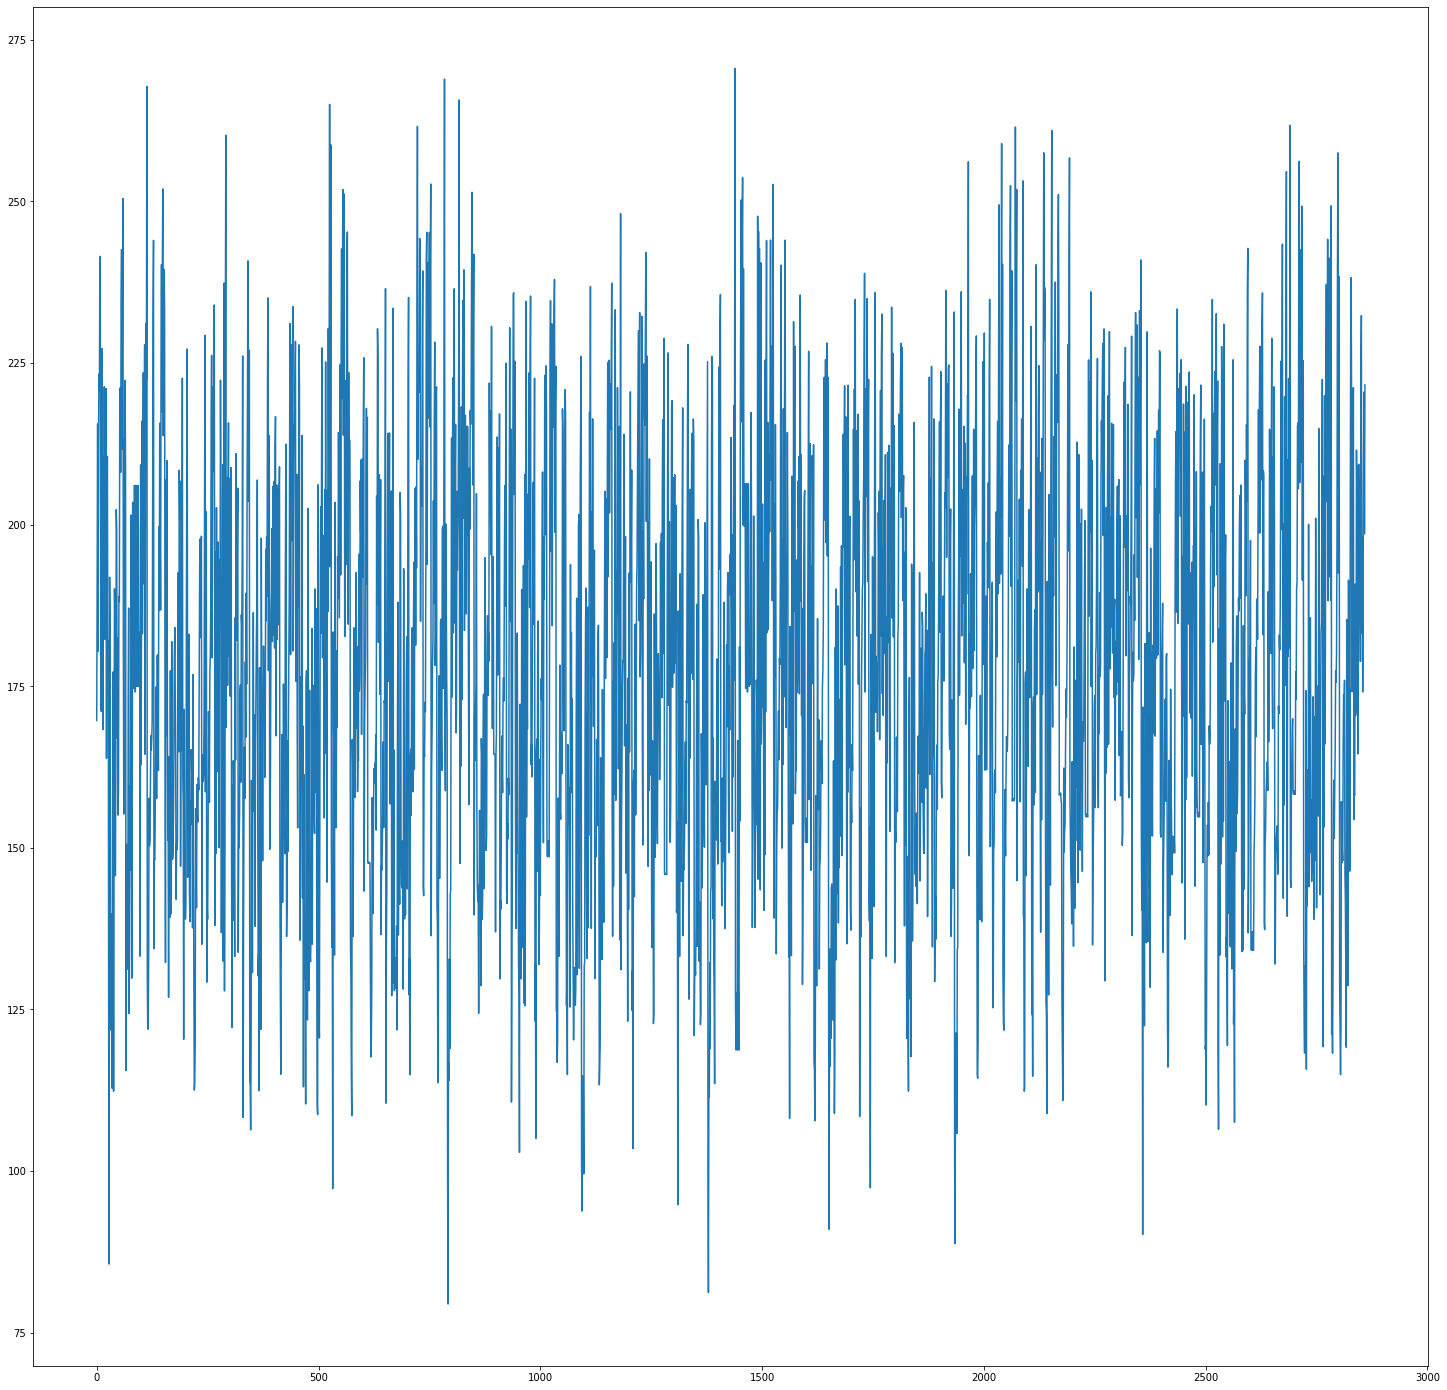

In [115]:
#####radomforest#####
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, X_test)
y_predict = rf_model.predict(y_train)
print(y_predict)
plt.plot(y_predict)
print(rf_model.score(X_train, X_test))
print(rf_model.score(y_train, y_test))

In [116]:
imp = rf_model.feature_importances_
feature_list = pd.concat([pd.Series(list(X_train)), pd.Series(rf_model.feature_importances_)], axis=1)
feature_list.columns = ['features_name', 'importance']
feature_list.sort_values("importance", ascending =False)[:20]

,features_name,importance
7,count,0.31785
2,방송내_순서,0.14325
1,상품코드,0.13016
5,기온,0.12509
3,브랜드순위,0.12305
0,판매단가,0.07417
4,상품군판매단가순위,0.06372
6,휴일,0.02271


In [117]:
imp = gbrt.feature_importances_
feature_list = pd.concat([pd.Series(list(X_train)), pd.Series(gbrt.feature_importances_)], axis=1)
feature_list.columns = ['features_name', 'importance']
feature_list.sort_values("importance", ascending =False)[:20]

,features_name,importance
7,count,0.36589
2,방송내_순서,0.16457
3,브랜드순위,0.14558
1,상품코드,0.12196
4,상품군판매단가순위,0.06981
0,판매단가,0.06582
5,기온,0.05214
6,휴일,0.01424
